In [1]:
##how many columns
import calendar as cld
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime

fh = 'train.csv'
df = pd.read_csv(fh)

print(len(df.columns))

12


In [2]:
##how many rows
print(len(df))

10886


In [3]:
##what are the datatype
print(df.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [4]:
##Are there missing values in each columns
df.isnull().sum()
##no missing value in each column


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
#feature engineer
def get_season(season_num):
    if season_num == 1:
        return 'Spring'
    elif season_num == 2:
        return 'Summer'
    elif season_num == 3:
        return 'Fall'
    elif season_num == 4:
        return 'Winter'
    
def get_weather(weather_num):
    if weather_num == 1:
        return 'Clear'
    elif weather_num == 2:
        return 'Mist + Cloudy'
    elif weather_num == 3:
        return 'Light Snow'
    elif weather_num == 4:
        return 'Snow + Fog '
 
df['datetime'] = pd.to_datetime(df.datetime)
df['hour'] = df['datetime'].map(lambda x: x.hour)
df['month'] = df['datetime'].map(lambda x: x.month)
df['date'] = df['datetime'].map(lambda x: str(datetime.date(x))[5:])
df['season_cat'] = df['season'].map(get_season).astype('category')
df['weather_cat'] = df['weather'].map(get_weather).astype('category')
df['week_day'] = df['datetime'].map(lambda x: cld.day_name[x.weekday()-1]).astype('category')
new_df = df[['datetime','holiday', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'month', 'date', 'season_cat', 'weather_cat', 'week_day']]
new_df['hour'].astype('category')
new_df['datetime'].astype('category')
new_df['month'].astype('category')
new_df['date'].astype('category')
new_df['season_cat'].astype('category')
new_df['weather_cat'].astype('category')
new_df['week_day'].astype('category')

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
5          Friday
6          Friday
7          Friday
8          Friday
9          Friday
10         Friday
11         Friday
12         Friday
13         Friday
14         Friday
15         Friday
16         Friday
17         Friday
18         Friday
19         Friday
20         Friday
21         Friday
22         Friday
23         Friday
24       Saturday
25       Saturday
26       Saturday
27       Saturday
28       Saturday
29       Saturday
           ...   
10856      Monday
10857      Monday
10858      Monday
10859      Monday
10860      Monday
10861      Monday
10862     Tuesday
10863     Tuesday
10864     Tuesday
10865     Tuesday
10866     Tuesday
10867     Tuesday
10868     Tuesday
10869     Tuesday
10870     Tuesday
10871     Tuesday
10872     Tuesday
10873     Tuesday
10874     Tuesday
10875     Tuesday
10876     Tuesday
10877     Tuesday
10878     Tuesday
10879     Tuesday
10880     

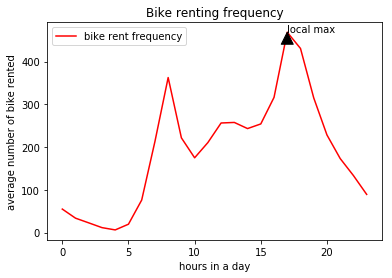

In [6]:
%matplotlib inline
##What hour of a day are bikes rented most?
result = df['count'].groupby(df['hour']).mean()
result = result.reset_index()
count_max = result['count'].max()
hour_loc = result.loc[result['count'] == result['count'].max()]['hour']

plt.plot(result['hour'], result['count'], color='r')
plt.title('Bike renting frequency')
plt.xlabel('hours in a day')
plt.ylabel('average number of bike rented')
plt.annotate('local max', xy=(hour_loc, count_max), 
            arrowprops=dict(facecolor='black', shrink=1),
            )
plt.legend(['bike rent frequency'])
##Bike is rented most at 5PM

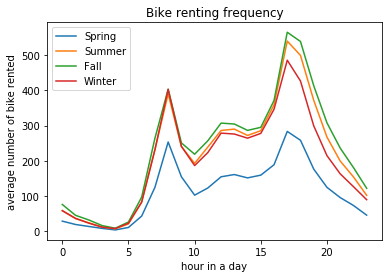

In [7]:
%matplotlib inline
#At what season and what hour of a day are bikes rented most?
result_season_hour = df.groupby([df['hour'],df['season_cat']]).mean()['count'].to_frame().reset_index()
#print(result_season_hour.loc[lambda x: x.])


#data = result_season_hour['count']
t1 = result_season_hour.loc[lambda x: x['season_cat'] == 'Spring']
t2 = result_season_hour.loc[lambda x: x['season_cat'] == 'Summer']
t3 = result_season_hour.loc[lambda x: x['season_cat'] == 'Fall']
t4 = result_season_hour.loc[lambda x: x['season_cat'] == 'Winter']

plt.plot(t1['hour'],t1['count'])
plt.plot(t2['hour'],t2['count'])
plt.plot(t3['hour'],t3['count'])
plt.plot(t4['hour'],t4['count'])
plt.title('Bike renting frequency')
plt.xlabel('hour in a day')
plt.ylabel('average number of bike rented')
plt.legend(['Spring','Summer','Fall','Winter'])

##regardless of the season, bike is mostly rented at 5pm


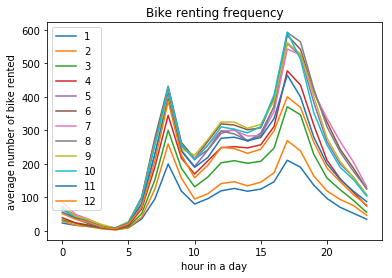

In [8]:
%matplotlib inline
##At which month and what hour of a day are bikes rented most?

def get_month(datetime):
    return datetime.month

df['month'] = df['datetime'].apply(get_month)

result_month_hour = df.groupby([df['hour'],df['month']]).mean()['count'].to_frame().reset_index()

for i in range(1,13):
    temp = result_month_hour.loc[lambda x: x['month'] == i]
    plt.plot(temp['hour'],temp['count'])
    


plt.title('Bike renting frequency')
plt.xlabel('hour in a day')
plt.ylabel('average number of bike rented')
month_index = range(1,13)
plt.legend(month_index)

## regardless of the month, bike is mostly rented at 5pm


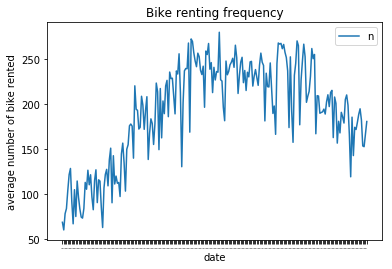

In [9]:
%matplotlib inline
#Which date have the most rented bikes in the dataset?
import matplotlib.dates as mdates

result = df.groupby(df['date']).mean()['count']
fig, ax = plt.subplots(1,1,sharex=False,sharey=False)
#fig.size = 
ax.set_xticklabels(df['date'], rotation=0, fontsize=0.0001)
plt.plot(result.index,result)
plt.title('Bike renting frequency')
plt.xlabel('date')
plt.ylabel('average number of bike rented')
plt.legend('numbike')

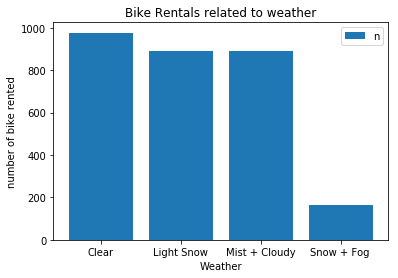

In [10]:
##group by mean bar
# Explore bike rentals in terms of weather
#count_by_weather= df[['weather_cat','count']]
plt.bar(df['weather_cat'],df['count'])
plt.title('Bike Rentals related to weather')
plt.xlabel('Weather')
plt.ylabel('number of bike rented')
plt.legend('numbike')


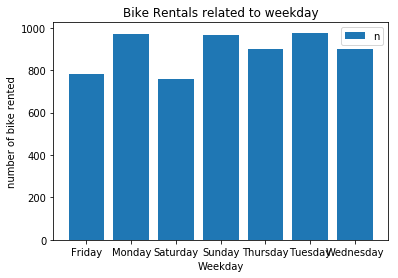

In [11]:
# Explore bike rentals in terms of weekday
#group by mean 
##box plot
plt.bar(df['week_day'],df['count'])
plt.title('Bike Rentals related to weekday')
plt.xlabel('Weekday')
plt.ylabel('number of bike rented')
plt.legend('numbike')

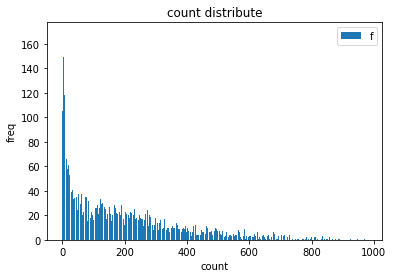

In [12]:
#plot the general distribution of "count" column (histogram)

dist = df.groupby(['count']).size()
plt.bar(dist.index,dist)
plt.title('count distribute')
plt.xlabel('count')
plt.ylabel('freq')
plt.legend('freq')


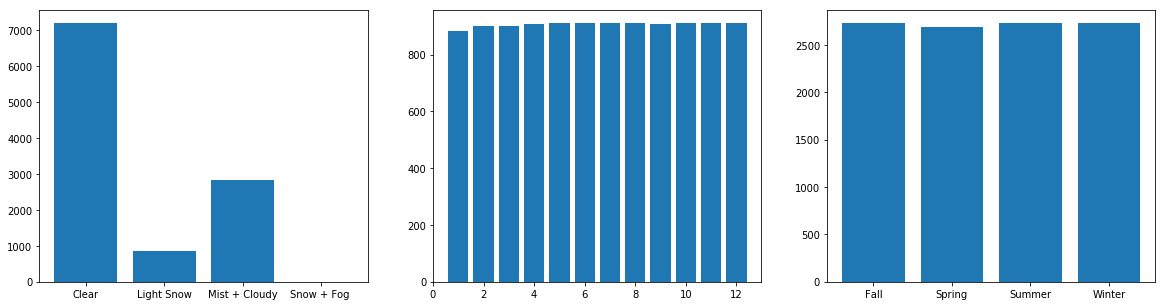

In [13]:
#explore what the most frequently seen weather/month/season
dist_weather = new_df.groupby(['weather_cat']).size()
dist_month = new_df.groupby(['month']).size()
dist_season = new_df.groupby(['season_cat']).size()
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=False)
ax1.bar(dist_weather.index,dist_weather)
ax2.bar(dist_month.index,dist_month)
ax3.bar(dist_season.index,dist_season)
fig.set_figheight(5)
fig.set_figwidth(20)
##bike is mostly rented on a clear day
##month and season has minimal effect on number of bike rented


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,0.971524
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,0.001731
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,-0.003394
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,0.012144
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.257589
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.264173
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,0.204537
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,-0.150192
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.092722
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.169451


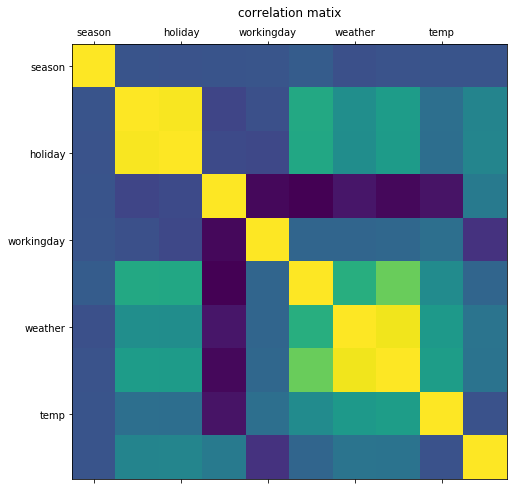

In [14]:
#explore correlation matrix and plots
fig, ax = plt.subplots()
ax.matshow(new_df.corr())
ax.set_title('correlation matix')
ax.set_xticklabels(['']+df.columns)
ax.set_yticklabels(['']+df.columns)
fig.set_figheight(8)
fig.set_figwidth(8)
df.corr()

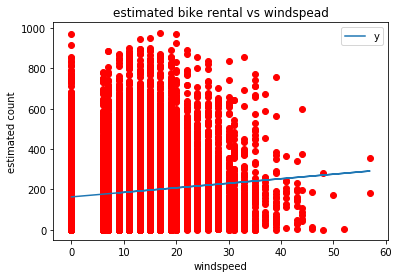

In [43]:
#use the package you choose to model a single variable regession
from scipy import stats
import numpy as np
x = df['windspeed']
y = df['count']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
y_estimated = df['windspeed'].apply(lambda x: slope*x + intercept).reset_index().set_index(df['windspeed'])
plt.plot(y_estimated.index,y_estimated['windspeed'])
plt.title('estimated bike rental vs windspead')
plt.xlabel('windspeed')
plt.ylabel('estimated count')
plt.legend('y*')
plt.scatter(x,y,color='r')

In [68]:
## cost function
import numpy as np
def error_rate(y_pred,y_actual):
    err_sum = 0
    for i in range(len(y_pred)):
        if (y_actual[i]==0):
            err_rate = abs(y_pred[i]-y_actual[i])
        else:
            err_rate = abs(y_pred[i]-y_actual[i])/y_actual[i]
        err_sum += err_rate
    return err_sum/len(y_pred)

In [69]:
from sklearn.cross_validation import train_test_split
x_sre = df['windspeed'].values
y_sre = df['count'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x_sre,y_sre)
y_pred = slope*x_sre + intercept

error_rate(y_pred,y_sre)
##error_rate 7.805

7.8057338936732039

In [17]:
print(new_df.columns)
X = new_df.iloc[:, new_df.columns != 'count'].values
y = new_df.iloc[:,8].values
X[:,9]


Index(['datetime', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'hour', 'month', 'date', 'season_cat',
       'weather_cat', 'week_day'],
      dtype='object')


array([1, 1, 1, ..., 12, 12, 12], dtype=object)

In [18]:
##onehotencoder -- change categorical data to boolean
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
df_regress = new_df[['holiday','temp','atemp','humidity','windspeed','casual','registered','count']]
df_regress[pd.get_dummies(new_df['weather_cat']).columns]=pd.get_dummies(new_df['weather_cat'])
df_regress[pd.get_dummies(new_df['season_cat']).columns]=pd.get_dummies(new_df['season_cat'])
df_regress[pd.get_dummies(new_df['week_day']).columns]=pd.get_dummies(new_df['week_day'])
df_regress[pd.get_dummies(new_df['month']).columns]=pd.get_dummies(new_df['month'])
df_regress[pd.get_dummies(new_df['hour']).columns]=pd.get_dummies(new_df['hour'])
df_regress[pd.get_dummies(new_df['season_cat']).columns]=pd.get_dummies(new_df['weather_cat'])
df_regress[pd.get_dummies(new_df['date']).columns]=pd.get_dummies(new_df['date'])


/Users/mac/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [19]:
##normalization
from sklearn import preprocessing

x = df_regress.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns=df_regress.columns

In [20]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


columns=list(df_normalized.set_index('count').columns)

def backward_elimination(df_regress,columns,step):
    #step=step+1
    #print(step)
    X = df_regress[columns]
    y = df_regress['count']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    predictor = ''
    p_value_max = 0
    predictor_index=0
    for i in range(len(columns)):
        if est2.pvalues[columns[i]]>p_value:
            p_value_max = est2.pvalues[columns[i]]
            predictor = columns[i]
            predictor_index=i
        else:
            continue
    if p_value_max > 0.05:
        columns.pop(i)
        return backward_elimination(df_regress,columns,step)
    else:
        return columns
        
columns_to_keep = backward_elimination(df_normalized,columns,0)
print(columns_to_keep)

/Users/mac/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


['holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'Clear', 'Light Snow', 'Mist + Cloudy', 'Snow + Fog ', 'Fall', 'Spring', 'Summer', 'Winter', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, '01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14', '01-15', '01-16', '01-17', '01-18', '01-19', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16', '02-17', '02-18', '02-19', '03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11', '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18', '03-19', '04-01', '04-02', '04-03', '04-04', '04-05', '04-06', '04-07', '04-08', '04-09', '04-10', '04-11', '04-12', '04-13', '04-14', '04-15', '04-16', '04-17',

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
X_be = df_regress[columns_to_keep].values
y_be = df_regress['count'].values
sc_X = StandardScaler()
sc_X.fit(X_be)
X_be = sc_X.transform(X_be)
y_be.reshape(1,-1)
X_train, X_test, y_train, y_test = train_test_split(X_be, y_be, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
error_rate(regressor.predict(X_test),y_test)
##error_rate for backward elimination is 2.26

2.2640558543176057e-14

In [27]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

#columns = new_df.iloc[:, new_df.columns != 'count'].columns
for i in {0,8,9,10,11,12,13}:
    X[:,i] = le.fit_transform(X[:,i])

onehotencoder = OneHotEncoder(categorical_features = [0,8,9,10,11,12,13])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]



In [22]:
# Splitting the dataset into the Training set and Test set
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




/Users/mac/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


8708


In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X.fit(X)
X = sc_X.transform(X)
y.reshape(1,-1)

array([[ 16,  40,  32, ..., 168, 129,  88]])

In [29]:
# Fitting multiple linear regression to the training dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[ 244.  239.  229. ...,  627.  450.   75.]


In [26]:
##get indexes for 5 training groups using random choice
import numpy as np
from sklearn.svm import SVR
index_array = np.array(range(len(X)))
np.random.shuffle(index_array)
n = int(len(index_array)*0.2)
train_index = index_array[0:n]
test_index = index_array[n+1:]
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
#regressor = LinearRegression()
#regressor.fit(X_train, y_train)
clf = SVR()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
error_rate(y_pred,y_test)

5.9842091596484588

In [31]:
import numpy as np
from sklearn.svm import SVR
def kfold_partition(X,y,k):
    index_list = list(range(len(X)))
    
    np.random.shuffle(index_list)
    n = int(len(index_list)/k)
    for i in list(range(k)):
        if i == 0:
            train_index_list = index_list[0:n]
            test_index_list = index_list[n:]
        elif i ==1:
            train_index_list = [train_index_list,index_list[i*n:n*(i+1)]]
            test_index_list = [test_index_list,index_list[:i*n-1].append(index_list[n*(i+1):])]
        elif (i>0 and i <k-1):
            train_index_list.append(index_list[i*n:n*(i+1)])
            test_index_list.append(index_list[:i*n-1].append(index_list[n*(i+1):]))
        elif (i== k-1):
            train_index_list.append(index_list[i*n:])
            test_index_list.append(index_list[:i*n-1])
    return train_index_list, test_index_list
                                            

In [32]:
from sklearn.svm import SVR
def kfold_implement(X,y,clf,k):
    train_index_list, test_index_list = kfold_partition(X,y,k)
    sum_err_rate = 0
    for i in range(k):
        train_index = train_index_list[i]
        test_index = train_index_list[i]
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        sum_err_rate += error_rate(y_pred,y_test)
        
    return sum_err_rate/k
clf = SVR()
kfold_implement(X,y,clf,5)
###error rate is 5.6

5.6075063139669812

In [35]:
#try to use Polynomial Regression to fit the model. 
#Use only only two parameters of your choice and fit up to 2nd degree polynomial
#And calculate the cost function, compare with multiple linear regression 
#choose temp and windspeed as two parameters
from sklearn.preprocessing import StandardScaler
df_poly = df_normalized[['temp','windspeed']]
df_poly['temp_sq'] = df_normalized['temp'].apply(lambda x: x**2)
df_poly['windspeed_sq'] = df_normalized['windspeed'].apply(lambda x: x**2)
df_poly['temp_times_windspeed'] = df_normalized.apply(lambda x:x['temp']*x['windspeed'],axis=1)
X_pol = df_poly.values
y_pol = df_normalized['count'].values
#use original cost function to calculate cost and compare with 10)
#corresponding cost for (10) is 16236.573908978904
X_train, X_test, y_train, y_test = train_test_split(X_pol, y_pol, test_size = 0.2, random_state = 0)

sc_X = StandardScaler()
sc_X.fit(X_train)
X_train = sc_X.transform(X_train)
sc_X.fit(X_test)
X_test = sc_X.transform(X_test)
#sc_y = StandardScaler()
#sc_y.fit(y_train)
y_train.reshape(1,-1)
y_test.reshape(1,-1)
# Fitting multiple linear regression to the training dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)
error_rate(y_pred,y_test)


/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

inf

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(y_pred)

[ 242.  234.  226. ...,  631.  457.   76.]
